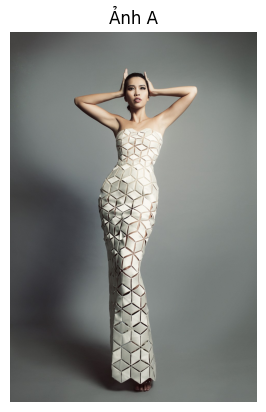

In [11]:
import cv2
from matplotlib import pyplot as plt

image_path = 'A.jpg'  
A = cv2.imread(image_path)
A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh
plt.imshow(A)
plt.title('Ảnh A')
plt.axis('off')
plt.show()


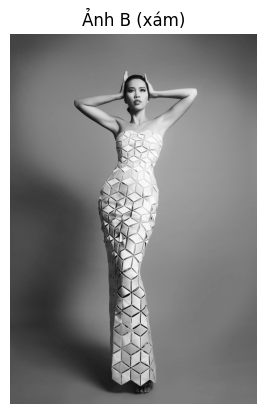

In [12]:
# Chuyển ảnh A sang ảnh xám
B = cv2.cvtColor(A, cv2.COLOR_RGB2GRAY)

# Hiển thị ảnh xám
plt.imshow(B, cmap='gray')
plt.title('Ảnh B (xám)')
plt.axis('off')
plt.show()



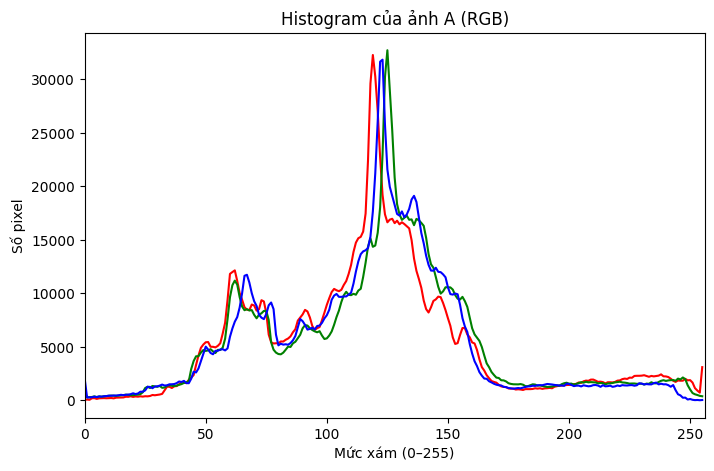

In [20]:
colors = ('r', 'g', 'b')
plt.figure(figsize=(8, 5))
for i, col in enumerate(colors):
    hist = cv2.calcHist([A], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

plt.title('Histogram của ảnh A (RGB)')
plt.xlabel('Mức xám (0–255)')
plt.ylabel('Số pixel')
plt.show()

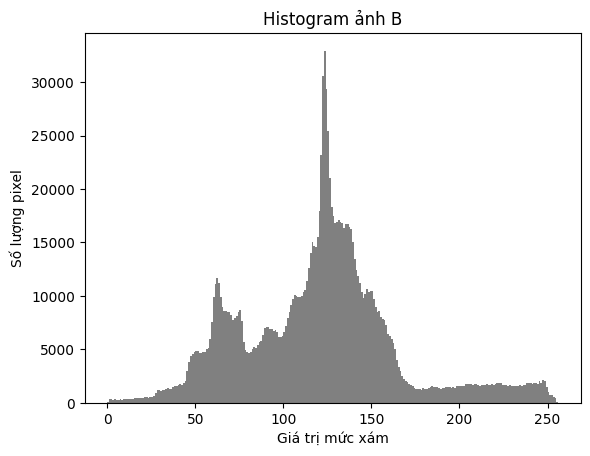

In [13]:
plt.hist(B.ravel(), bins=256, range=[0,256], color='gray')
plt.title('Histogram ảnh B')
plt.xlabel('Giá trị mức xám')
plt.ylabel('Số lượng pixel')
plt.show()



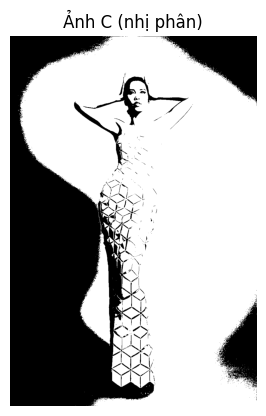

In [14]:
# Chuyển ảnh B sang ảnh nhị phân
_, C = cv2.threshold(B, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Hiển thị ảnh nhị phân
plt.imshow(C, cmap='gray')
plt.title('Ảnh C (nhị phân)')
plt.axis('off')
plt.show()


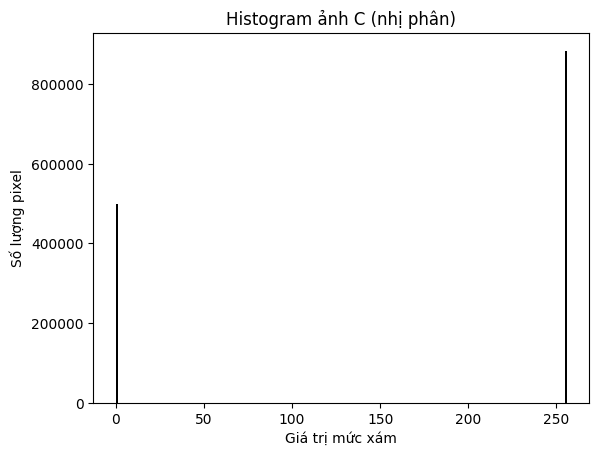

In [15]:
plt.hist(C.ravel(), bins=256, range=[0,256], color='black')
plt.title('Histogram ảnh C (nhị phân)')
plt.xlabel('Giá trị mức xám')
plt.ylabel('Số lượng pixel')
plt.show()


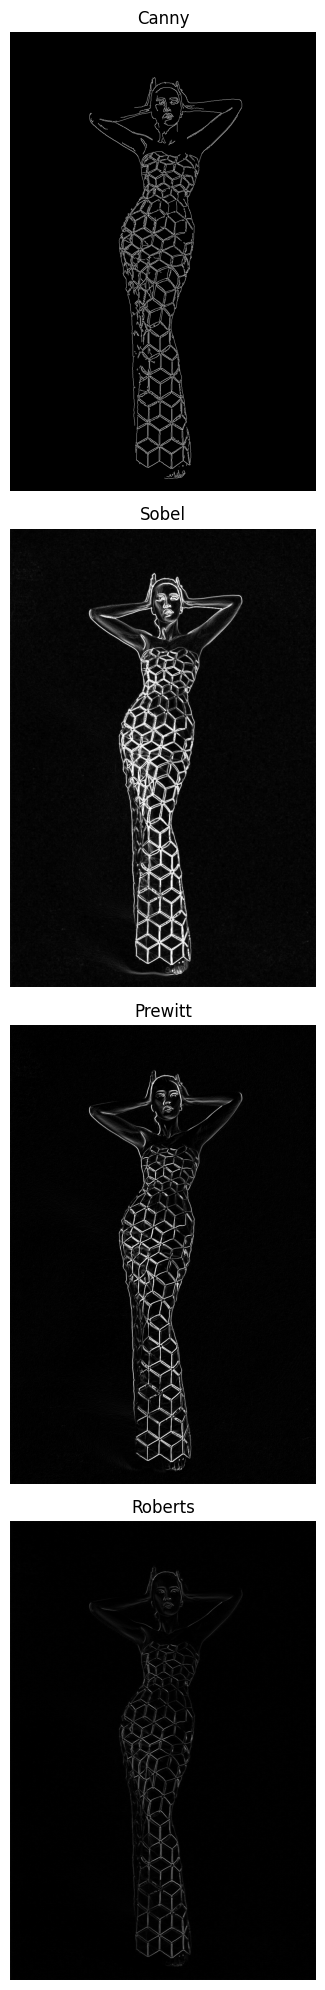

In [ ]:
# Phát hiện biên bằng các bộ lọc khác nhau

# Canny
import numpy as np

edges_canny = cv2.Canny(B, 100, 200)

# Sobel
sobelx = cv2.Sobel(B, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(B, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel = cv2.magnitude(sobelx, sobely)
edges_sobel = cv2.convertScaleAbs(edges_sobel)

# Prewitt
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]], dtype=int)
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]], dtype=int)
prewittx = cv2.filter2D(B, -1, kernelx)
prewitty = cv2.filter2D(B, -1, kernely)
edges_prewitt = cv2.magnitude(prewittx.astype(np.float32), prewitty.astype(np.float32))
edges_prewitt = cv2.convertScaleAbs(edges_prewitt)

# Robert
kernel_roberts_x = np.array([[1, 0], [0, -1]], dtype=int)
kernel_roberts_y = np.array([[0, 1], [-1, 0]], dtype=int)
robertsx = cv2.filter2D(B, -1, kernel_roberts_x)
robertsy = cv2.filter2D(B, -1, kernel_roberts_y)
edges_roberts = cv2.magnitude(robertsx.astype(np.float32), robertsy.astype(np.float32))
edges_roberts = cv2.convertScaleAbs(edges_roberts)

# Hiển thị kết quả
fig, axs = plt.subplots(4, 1, figsize=(6, 20))  # 4 hàng, 1 cột
images = [
    (edges_canny, 'Canny'),
    (edges_sobel, 'Sobel'),
    (edges_prewitt, 'Prewitt'),
    (edges_roberts, 'Roberts')
]

for ax, (img, title) in zip(axs, images):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

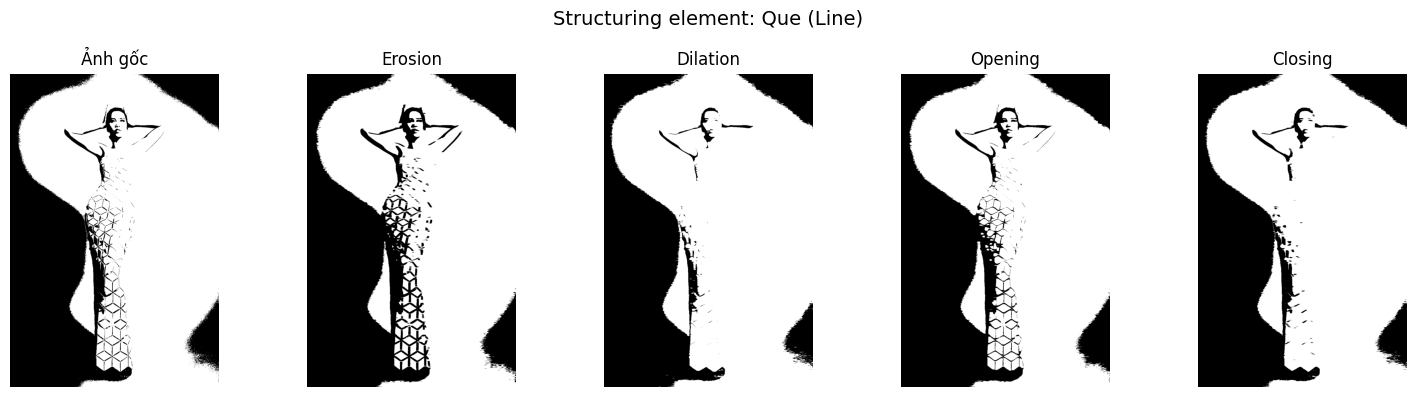

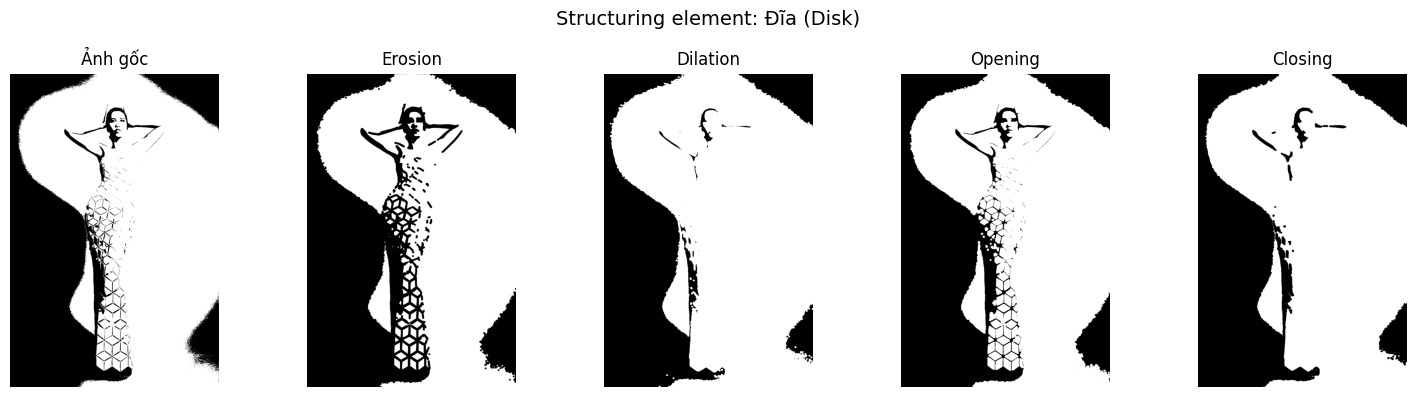

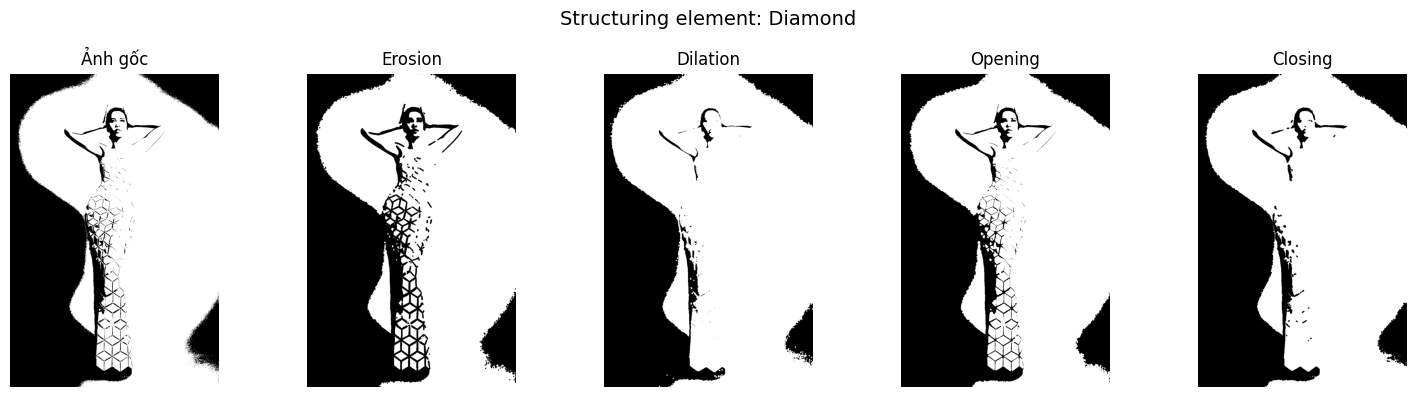

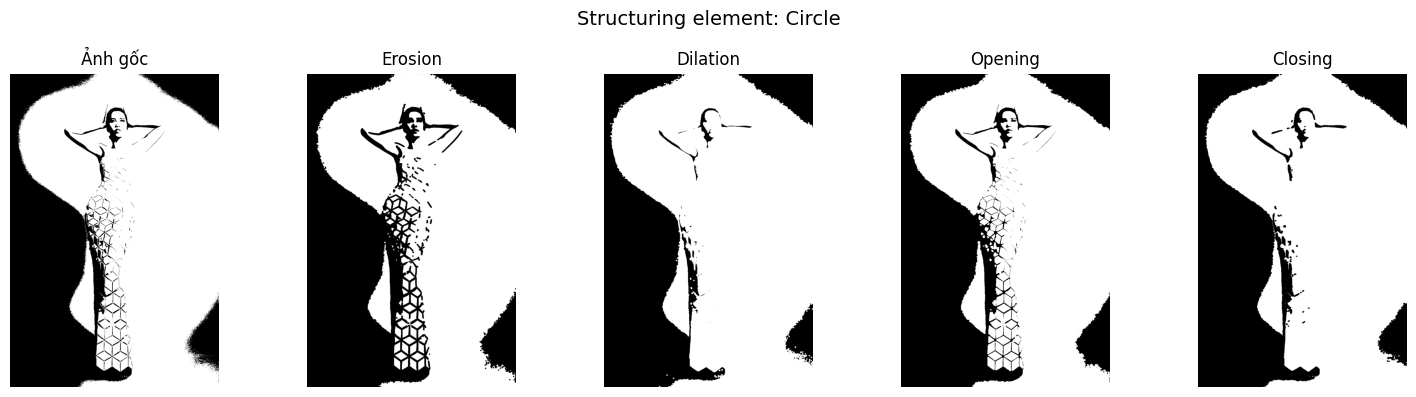

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

_, C = cv2.threshold(B, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Hàm tạo kernel diamond
def diamond_kernel(size):
    k = np.zeros((size, size), dtype=np.uint8)
    center = size // 2
    for i in range(size):
        for j in range(size):
            if abs(i - center) + abs(j - center) <= center:
                k[i, j] = 1
    return k

# Tạo các phần tử cấu trúc
kernel_line = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1)) 
kernel_disk = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
kernel_diamond = diamond_kernel(7)
kernel_circle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

kernels = [
    ('Que (Line)', kernel_line),
    ('Đĩa (Disk)', kernel_disk),
    ('Diamond', kernel_diamond),
    ('Circle', kernel_circle)
]

# Thao tác morphology
operations = {
    'Erosion': cv2.erode,
    'Dilation': cv2.dilate,
    'Opening': lambda img, k: cv2.morphologyEx(img, cv2.MORPH_OPEN, k),
    'Closing': lambda img, k: cv2.morphologyEx(img, cv2.MORPH_CLOSE, k)
}

# Vẽ kết quả
for kname, k in kernels:
    fig, axs = plt.subplots(1, len(operations) + 1, figsize=(15, 4))
    fig.suptitle(f'Structuring element: {kname}', fontsize=14)

    # Ảnh gốc
    axs[0].imshow(C, cmap='gray')
    axs[0].set_title('Ảnh gốc')
    axs[0].axis('off')

    # Các phép morphology
    for i, (opname, func) in enumerate(operations.items(), start=1):
        result = func(C, k)
        axs[i].imshow(result, cmap='gray')
        axs[i].set_title(opname)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()
